# Color segmentation

This notebook demonstrates how to segment an image based on an RGB value. For a more in depth discussion refer to chapter XX in the book. 

Copyright Matthias Schröter under a CC license.

In [1]:
# loading our default set of libraries 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from skimage.io import imread

# our working image
astro = imread('imageio:astronaut.png')
r = astro[:,:,0]
g = astro[:,:,1]
b = astro[:,:,2]

### First we create an RGB cube histogram in order to identify the threshold for the segmentation

In [2]:
# import library for 3D plotting
from mpl_toolkits import mplot3d
from matplotlib import colors

# magic function for interactive plot
%matplotlib notebook

################### fix me: if the whole notebook is run at once, this figure will not show up as it takes to 
# long to render. No problem if notebook is run cell by cell

In [3]:
# create list with colors for coloring plot points
img_size = astro.shape[0] * astro.shape[1]
pixel_colors = astro.reshape(img_size, 3)

norm = colors.Normalize()
pixel_colors = norm(pixel_colors).tolist()

<IPython.core.display.Javascript object>


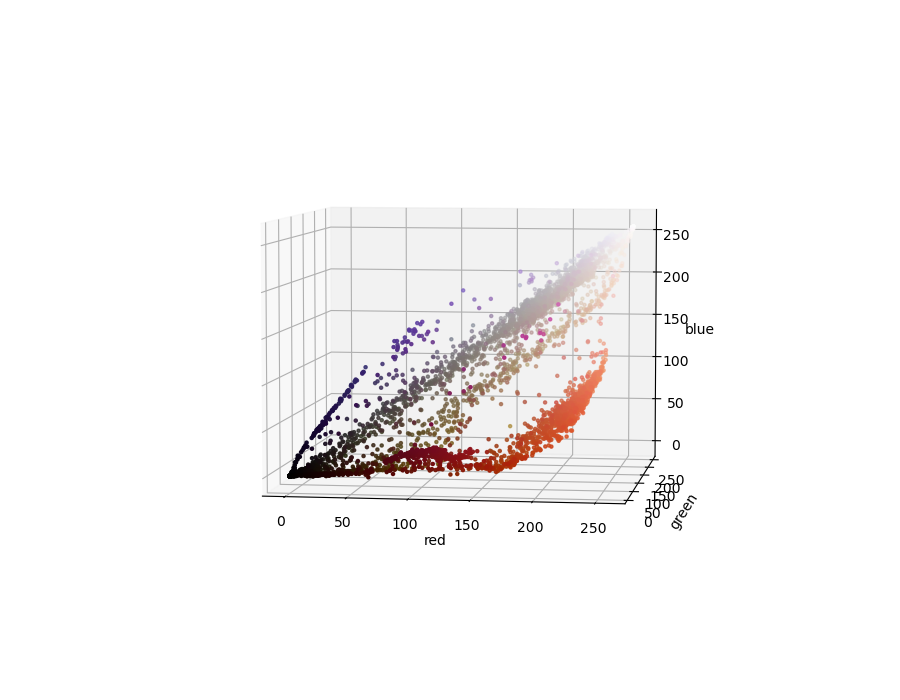

In [4]:
# make an interactive plot
plt.figure('RGB histogram', figsize=(9,7))
ax = plt.axes(projection = '3d')

# plot every 50th pixel (only for performanc reasons)
ax.scatter(r.flatten()[::50],g.flatten()[::50],b.flatten()[::50], facecolor = pixel_colors[::50], marker='.')

ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')

plt.show()

### Based on the RGB cube we see that the orange pixels can be described with red values larger than 170, blue values smaller than 110 and green values smaller than 140

In [5]:
# segmentation in color space with three conditions
binary_image = (r>170) & (b<110) & (g <140)

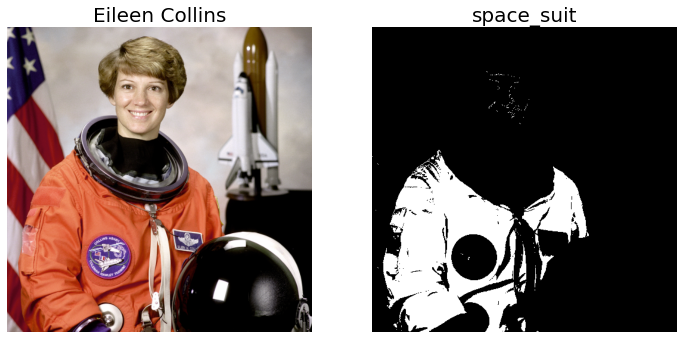

In [6]:
%matplotlib inline

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.imshow(astro)
plt.axis('off')
plt.title('Eileen Collins', fontsize=20)

plt.subplot(122)
plt.imshow(binary_image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('space_suit', fontsize=20)

plt.show()

### finally we create a new image just containing the space suit. 

Morphological filters provide a method to remove the orangepixel dust from the hair and fill in the holes. See the corresponding exercise in section xx. 

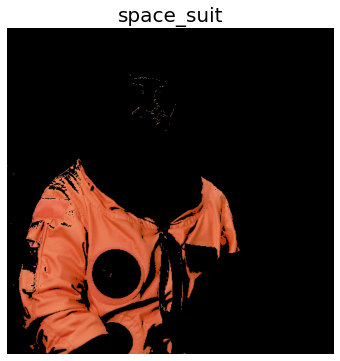

In [7]:
binary_image_rgb = np.stack((r * binary_image, g * binary_image, b * binary_image), axis = -1)

plt.figure(figsize=(12,6))

plt.imshow(binary_image_rgb)
plt.axis('off')
plt.title('space_suit', fontsize=20)

plt.show()